## Assignment: A6

#### Student Name 1: Christine Kim

#### UT EID 1: cmk3677

#### Student Name 2: Enrique Rivera Jr

#### UT EID 2: er34663

#### Due: 3/24/25


Do the following exercises from the book:

- 4.35
- 4.48
- 4.52
- 4.86


In [2]:
import numpy as np

##### Ex: 4.35
# ![4.35](A6/4.35.png)

In [6]:
# Matrix A and vector b as NumPy arrays
A = np.array([[3, 6,  8],
              [2, 7, -1],
              [5, 2,  2]], dtype=float)
b = np.array([-13, 4, 1], dtype=float)

# We can implement our own LU decomposition or do it by hand.
# For illustration, here's a naive code for an LU factor (without pivoting):

def lu_no_pivot(A):
    n = A.shape[0]
    L = np.eye(n, dtype=float)
    U = A.copy().astype(float)

    for k in range(n-1):
        for i in range(k+1, n):
            # Multiplier
            L[i,k] = U[i,k] / U[k,k]
            # Eliminate in U
            U[i, k:] = U[i, k:] - L[i,k]*U[k, k:]
    return L, U

L, U = lu_no_pivot(A)

# Forward solve (Ly = b)
def forward_solve(L, b):
    n = L.shape[0]
    y = np.zeros_like(b)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i,:i], y[:i])
    return y

# Back solve (Ux = y)
def back_solve(U, y):
    n = U.shape[0]
    x = np.zeros_like(y)
    for i in reversed(range(n)):
        x[i] = (y[i] - np.dot(U[i,i+1:], x[i+1:])) / U[i,i]
    return x

y = forward_solve(L,b)
x = back_solve(U,y)

print("L =\n", L)
print("U =\n", U)
print("Solution x =", x)


L =
 [[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [ 1.66666667 -2.66666667  1.        ]]
U =
 [[  3.           6.           8.        ]
 [  0.           3.          -6.33333333]
 [  0.           0.         -28.22222222]]
Solution x = [ 1.  0. -2.]


##### Ex: 4.48
# ![4.48](A6/4.48.png)
#

In [5]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,0]], dtype=float)
b = np.array([1,0,2], dtype=float)

# (a) Compute the QR factorization of A
Q, R = np.linalg.qr(A)   # Q is orthonormal, R is upper triangular

# (b) Form y = Q^T b
y = Q.T @ b

# (c) Solve R x = y (back substitution or np.linalg.solve, since R is square/upper‐triangular)
x = np.linalg.solve(R, y)

print("Q =\n", Q)
print("R =\n", R)
print("Q^T b =", y)
print("Solution x =", x)


Q =
 [[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
R =
 [[-8.1240384  -9.6011363  -3.32347026]
 [ 0.          0.90453403  4.52267017]
 [ 0.          0.         -3.67423461]]
Q^T b = [-1.84637236  0.30151134  1.22474487]
Solution x = [-2.          2.         -0.33333333]


##### Ex: 4.52
# ![4.52](A6/4.52.png)
#

Fitted coefficients:
  a = 13.029137529137511
  b = -12.193193473193352
  c = 15.23706293706265


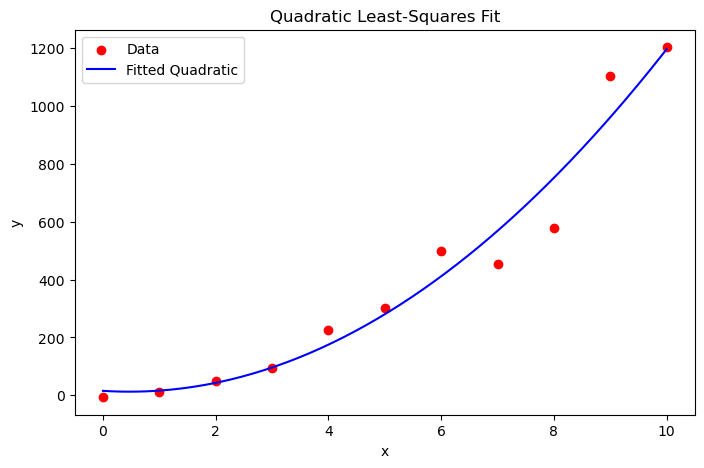

In [8]:
import matplotlib.pyplot as plt

# 1) The data
x_data = np.array([0,1,2,3,4,5,6,7,8,9,10], dtype=float)
y_data = np.array([-6.8, 11.8, 50.6, 94, 224.3, 301.7, 
                   499.2, 454.7, 578.5, 1102, 1203.2], dtype=float)

# 2) Build the A matrix for a quadratic fit: [x^2, x, 1]
A = np.column_stack((x_data**2, x_data, np.ones_like(x_data)))

# 3) Solve the least squares problem A*[a,b,c]^T ≈ y
#    np.linalg.lstsq returns (coeffs, residuals, rank, singular_vals)
coeffs, *_ = np.linalg.lstsq(A, y_data, rcond=None)
a, b, c = coeffs

print("Fitted coefficients:")
print(f"  a = {a}")
print(f"  b = {b}")
print(f"  c = {c}")

# 4) Plot the data and the fit
#    Make a smooth x-array for plotting the quadratic
x_plot = np.linspace(x_data.min(), x_data.max(), 200)
y_plot = a*(x_plot**2) + b*x_plot + c

plt.figure(figsize=(8,5))
plt.scatter(x_data, y_data, color='red', label='Data')
plt.plot(x_plot, y_plot, 'b-', label='Fitted Quadratic')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Least-Squares Fit')
plt.legend()
plt.show()


##### Ex: 4.86
# ![4.86](A6/4.86.png)
#



In [9]:
import numpy as np

def power_method(A, max_iters=1000, tol=1e-10):
    """
    Returns an approximation of the largest eigenvalue of A
    and the corresponding eigenvector via the Power Method.
    
    Parameters
    ----------
    A : numpy.ndarray
        Square matrix for which we seek the dominant eigenvalue/eigenvector
    max_iters : int
        Maximum number of iterations to perform
    tol : float
        Convergence tolerance based on change in eigenvalue estimates
        
    Returns
    -------
    (lambda_est, x_est) : (float, numpy.ndarray)
        Approximate largest eigenvalue and corresponding unit eigenvector
    """

    n = A.shape[0]
    # 1) Start with a random initial vector and normalize it
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)
    
    lambda_old = 0.0
    
    for _ in range(max_iters):
        # 2) Multiply by A
        Ax = A @ x
        
        # 3) Estimate the eigenvalue via Rayleigh quotient
        lambda_new = x @ Ax   # same as np.dot(x, Ax)
        
        # 4) Normalize Ax to get the next vector
        Ax_norm = np.linalg.norm(Ax)
        if Ax_norm == 0:
            # A somehow annihilated x (unlikely if A is not singular),
            # but just in case:
            break
        x_new = Ax / Ax_norm
        
        # 5) Check for convergence
        if abs(lambda_new - lambda_old) < tol:
            return (lambda_new, x_new)
        
        x = x_new
        lambda_old = lambda_new
    
    # If we exit the loop, we return the last estimate
    return (lambda_old, x)

# Example usage on the given matrix A
A = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 0, 1, 2],
    [3, 4, 5, 6]
], dtype=float)

largest_val, eigenvec = power_method(A)
print("Approx. largest eigenvalue =", largest_val)
print("Corresponding eigenvector =", eigenvec)


Approx. largest eigenvalue = 15.816774904550828
Corresponding eigenvector = [0.29492336 0.75736962 0.25016262 0.52614649]
